# Compute performance metrics for the given Y and Y_score without sklearn

In [45]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
<pre>
    <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
    <b>Note 3:</b> you need to derive the class labels from given score</pre>$y^{pred}= \text{[0 if y_score < 0.5 else 1]}$


<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [46]:
df_a = pd.read_csv('5_a.csv')
df_a.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [47]:
# write your code here for task A
df_a.shape

(10100, 2)

####           As we can see this dataset is highly unbalanced

In [48]:
df_a['y'].value_counts()

1.0    10000
0.0      100
Name: y, dtype: int64

In [49]:
'''
>>>a = np.arange(10)
>>>array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
>>>np.where(a < 5, a, 10*a)
>>>array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])
'''
# np.where(condition, x, y)
df_a['y_hat'] = np.where(df_a['proba'] <= 0.5, float(0), float(1))

In [50]:
df_a.head()

,y,proba,y_hat
0,1.0,0.637387,1.0
1,1.0,0.635165,1.0
2,1.0,0.766586,1.0
3,1.0,0.724564,1.0
4,1.0,0.889199,1.0


In [51]:
df_a['y_hat'].value_counts()

1.0    10100
Name: y_hat, dtype: int64

In [52]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       10100 non-null  float64
 1   proba   10100 non-null  float64
 2   y_hat   10100 non-null  float64
dtypes: float64(3)
memory usage: 236.8 KB


In [53]:
y = df_a.iloc[:,0].values
y_hat = df_a.iloc[:, 2].values

In [54]:
print('y:     ', y)
print('y_hat: ', y_hat)

y:      [1. 1. 1. ... 1. 1. 1.]
y_hat:  [1. 1. 1. ... 1. 1. 1.]


In [ ]:
'''
# https://machinelearningmastery.com/implement-machine-learning-algorithm-performance-metrics-scratch-python/
# calculate a confusion matrix
def confusion_matrix(actual, predicted):
    # all the unique label will stored in a set
    unique = set(actual) # unique: {0, 1}
    
    # it will create list of lists according total number of label in 'unique' set
    matrix = [list() for x in range(len(unique))] # matrix: [[], []]
    
    
    for i in range(len(unique)):
        matrix[i] = [0 for x in range(len(unique))] #matrix: [[0, 0], [0, 0]]
        
    lookup = dict()
    for i, value in enumerate(unique): #lookup: {0: 0, 1: 1}
        lookup[value] = i

    for i in range(len(actual)):
        x = lookup[actual[i]]
        y = lookup[predicted[i]]
        matrix[y][x] += 1
    return matrix

arr1 = [1,1,1,1,0,0,0,0,1,0]
arr2 = [1,1,1,1,0,0,0,0,0,1]
confusion_matrix(arr1, arr2)
# [[4, 1], [1, 4]]
'''

In [56]:
# calculate a confusion matrix
def confusion_matrix(actual, predicted):
    # all the unique classes will stored in a set
    unique = set(actual) # unique: {0, 1}
    
    # it will create list of lists according total number of label in 'unique' set
    matrix = np.zeros((len(unique), len(unique)))
        
    lookup = dict()
    for i, value in enumerate(unique): #lookup: {0: 0, 1: 1}
        lookup[value] = i

    for i in range(len(actual)):
        x = lookup[actual[i]]
        y = lookup[predicted[i]]
        matrix[y][x] += 1
    return matrix

conf = confusion_matrix(y, y_hat)

In [57]:
tn, fn, fp, tp = confusion_matrix(y, y_hat).ravel()

In [58]:
print(tn)
print(fn)
print(fp)
print(tp)

0.0
0.0
100.0
10000.0


In [59]:
def f1_socre_and_accuracy(conf_matrix):
    true_negative  = conf_matrix[0][0]
    false_negative = conf_matrix[0][1]
    false_positive = conf_matrix[1][0]
    true_positive  = conf_matrix[1][1]
    
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    
    f1_score = (2 * (precision * recall)) / (precision + recall)
    
    # sum_of_all_elements_of_confusion_matrix = np.concatenate(conf_matrix).sum()
    
    accuracy = (true_positive + true_negative) / np.concatenate(conf_matrix).sum()
    
    return f1_score, accuracy

print("F1 score and accuracy: ", f1_socre_and_accuracy(conf))

F1 score and accuracy:  (0.9950248756218906, 0.9900990099009901)


# ROC-AUC Score

In [60]:
def get_tpr_fpr(df):
    tp = ((df['y'] == 1.0 ) & (df['y_hat'] == 1)).sum()
    fp = ((df['y'] == 0.0 ) & (df['y_hat'] == 1)).sum()
    tn = ((df['y'] == 0.0 ) & (df['y_hat'] == 0)).sum()
    fn = ((df['y'] == 1.0 ) & (df['y_hat'] == 0)).sum()

    tpr = tp / (tp + fn )
    fpr = fp / (fp + tn)

    return [tpr, fpr]


# While computing AUC score you need to calculate "TP,"FP" at every threshold by using actual "y" and predicted "y_hat".

def all_thresholds_tpr_fpr_arr(df_original):
    tpr_for_all_thresholds = []
    fpr_for_all_thresholds = []

    sorted_df = df_original.sort_values(by=['proba'], ascending=False)
    unique_thresholds = sorted_df['proba'].unique()

    for threshold in unique_thresholds:
        sorted_df['y_hat'] = np.where(sorted_df['proba'] >= threshold, 1, 0)
        tpr_fpr = get_tpr_fpr(sorted_df)
        tpr_for_all_thresholds.append(tpr_fpr[0])
        fpr_for_all_thresholds.append(tpr_fpr[1])

    return tpr_for_all_thresholds, fpr_for_all_thresholds

In [96]:
all_tpr_together_a, all_fpr_together_a = all_thresholds_tpr_fpr_arr(df_a)
auc_score_a = np.trapz(all_tpr_together_a, all_fpr_together_a)
print('ROC-AUC Score for 5_a.csv: ', auc_score_a)

ROC-AUC Score for 5_a.csv:  0.48829900000000004


Text(0.5, 1.0, 'AUC=0.488299')

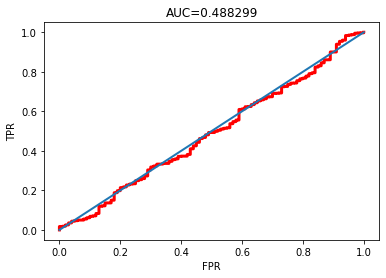

In [97]:
# Plotting of ROC-AUC Curve
import matplotlib.pyplot as plt
plt.plot(all_fpr_together_a, all_tpr_together_a, 'r', lw=3)
plt.plot([0, 1], [0, 1], lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score_a, 6)))



## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [63]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [64]:
# write your code here for task B
df_b.shape

(10100, 2)

In [65]:
df_b['y'].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [66]:
df_b['y_hat'] = np.where(df_b['proba'] <= 0.5, float(0), float(1))

In [67]:
df_b.head()

,y,proba,y_hat
0,0.0,0.281035,0.0
1,0.0,0.465152,0.0
2,0.0,0.352793,0.0
3,0.0,0.157818,0.0
4,0.0,0.276648,0.0


In [68]:
df_b['y_hat'].value_counts()

0.0    9806
1.0     294
Name: y_hat, dtype: int64

In [69]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       10100 non-null  float64
 1   proba   10100 non-null  float64
 2   y_hat   10100 non-null  float64
dtypes: float64(3)
memory usage: 236.8 KB


In [70]:
y = df_b.iloc[:,0].values
y_hat = df_b.iloc[:,2].values

In [71]:
print('y:     ', y)
print('y_hat: ', y_hat)

y:      [0. 0. 0. ... 0. 0. 0.]
y_hat:  [0. 0. 0. ... 0. 0. 0.]


In [72]:
conf = confusion_matrix(y, y_hat)

In [73]:
tn, fn, fp, tp = confusion_matrix(y, y_hat).ravel()

In [74]:
print(tn)
print(fn)
print(fp)
print(tp)

9761.0
45.0
239.0
55.0


In [75]:
print('f1 Score and accuracy: ')
print(f1_socre_and_accuracy(conf))

f1 Score and accuracy: 
(0.2791878172588833, 0.9718811881188119)


In [76]:
all_tpr_together_b, all_fpr_together_b = all_thresholds_tpr_fpr_arr(df_b)
auc_score_b = np.trapz(all_tpr_together_b, all_fpr_together_b)
print('ROC-AUC Score for 5_b.csv: ', auc_score_b)

ROC-AUC Score for 5_b.csv:  0.9377570000000001


Text(0.5, 1.0, 'AUC=0.937757')

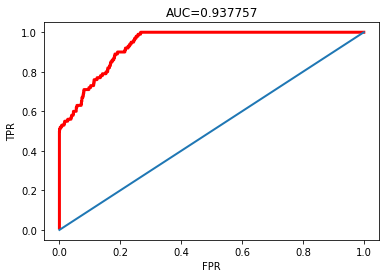

In [77]:
# Plotting of ROC-AUC Curve
import matplotlib.pyplot as plt
plt.plot(all_fpr_together_b, all_tpr_together_b, 'r', lw=3)
plt.plot([0, 1], [0, 1], lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score_b, 6)))

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [78]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [79]:
# write your code for task C
df_c.shape

(2852, 2)

In [80]:
actual_y_train_arr_c = df_c.iloc[:, 0].values
print('actual_y_train_arr_5_c', actual_y_train_arr_c)

actual_y_train_arr_5_c [0 0 0 ... 1 1 1]


In [81]:
y_prob_c = df_c.iloc[:, 1].values
print('y_prob_c', y_prob_c)

y_prob_c [0.45852068 0.50503693 0.41865174 ... 0.65916054 0.45626546 0.65916054]


In [82]:
unique_proba_thresholds_c = np.unique(df_c['prob'])

In [83]:
def get_a_metric(y_actual, y_prob, threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    min_a = float('inf')
    
    for i in range(len(y_prob)):
        if y_prob[i] >= threshold:
            if y_actual[i] == 1:
                tp += 1
            else:
                fp += 1
        
        if y_prob[i] < threshold:
            if y_actual[i] == 0:
                tn += 1
            else:
                fn += 1
    
    A = (500 * fn) + (100 * fp)
    
    return A

In [84]:
# Now a function to traverse the entire unique probability thresholds array
# and return the minimum value of A and also the corresponding threshold

def get_minimized_a(y_actual, y_prob, total_thresholds):
    min_a = float('inf')
    min_t = 0
    
    for threshold in total_thresholds:
        a = get_a_metric(y_actual, y_prob, threshold)
        if a <= min_a:
            min_a =min(a, min_a)
            min_t = threshold
    
    return min_a, min_t

In [85]:
print(get_minimized_a(actual_y_train_arr_c, y_prob_c, unique_proba_thresholds_c))

(141000, 0.2300390278970873)


There are 141000 minimum value of metrix A <br>
and the corresponding thresold is 0.2300390278970873


## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [86]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [87]:
df_d.shape

(157200, 2)

In [88]:
# write your code for task 5d
actual_y_d = df_d.iloc[:, 0].values
print('actual_y_d ', actual_y_d)

predicted_y_d = df_d.iloc[:, 1].values
print('predicted_y_d ', predicted_y_d)

actual_y_d  [101. 120. 131. ... 106. 105.  81.]
predicted_y_d  [100. 100. 113. ...  93. 101. 104.]


In [89]:
def mean_squared_error(y_actual, y_predicted):
    return np.mean((y_actual - y_predicted)**2)

In [90]:
print('Mean Square Error: ',mean_squared_error(actual_y_d, predicted_y_d))

Mean Square Error:  177.16569974554707


In [91]:
def mean_absolute_percentage_error(y_actual, y_predicted):
    return (np.mean( (np.abs(y_actual - y_predicted) / np.mean(y_actual))))
    # return ( (np.sum(np.abs(y_actual - y_predicted) )) / np.sum(y_actual)) # for avoiding divide by zero

In [92]:
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(actual_y_d, predicted_y_d))

Mean Absolute Percentage Error:  0.12912029940096867


In [93]:
def r2_score(y_train, y_pred):
    y_train_bar = y_train.mean()
    
    sum_squared_total = ((y_train - y_train_bar)**2).sum()
    sum_squared_residual = ((y_train - y_pred)**2).sum()
    
    return 1 - (sum_squared_residual / sum_squared_total)

In [94]:
print('R-Squared error: ',r2_score(actual_y_d, predicted_y_d))

R-Squared error:  0.9563582786990937
